In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
df = pd.read_csv(
    r"C:\Users\Vetri Selvi B\Downloads\archive (1)\IMDb Movies India.csv",
    encoding='latin1'
)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
df = df.dropna(subset=['Rating'])

In [21]:
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = df['Year'].astype(float)

In [22]:
df['Duration'] = df['Duration'].str.replace(' min', '')
df['Duration'] = df['Duration'].astype(float)

In [23]:
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = df['Votes'].astype(float)

In [24]:
df = df.dropna()

In [25]:
df['Genre'] = df['Genre'].str.split(',').str[0]
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [26]:
df = df.drop(
    ['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'],
    axis=1,
    errors='ignore'
)

In [27]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5659 non-null   float64
 1   Duration           5659 non-null   float64
 2   Rating             5659 non-null   float64
 3   Votes              5659 non-null   float64
 4   Genre_Adventure    5659 non-null   int64  
 5   Genre_Animation    5659 non-null   int64  
 6   Genre_Biography    5659 non-null   int64  
 7   Genre_Comedy       5659 non-null   int64  
 8   Genre_Crime        5659 non-null   int64  
 9   Genre_Documentary  5659 non-null   int64  
 10  Genre_Drama        5659 non-null   int64  
 11  Genre_Family       5659 non-null   int64  
 12  Genre_Fantasy      5659 non-null   int64  
 13  Genre_History      5659 non-null   int64  
 14  Genre_Horror       5659 non-null   int64  
 15  Genre_Music        5659 non-null   int64  
 16  Genre_Musical      5659 non-

In [29]:
X = df.drop('Rating', axis=1)
y = df['Rating']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.0073515312073622
R2 Score: 0.14257235541495406


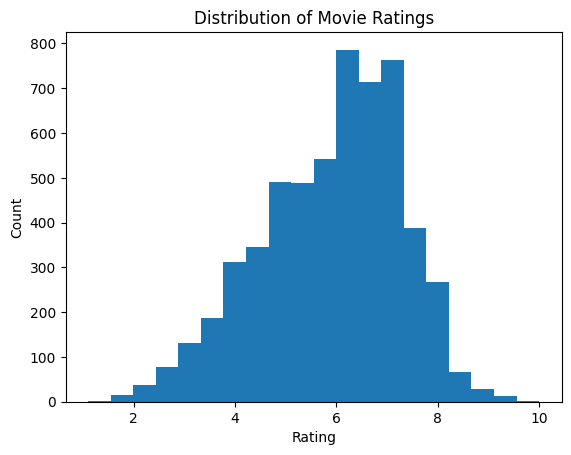

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['Rating'], bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

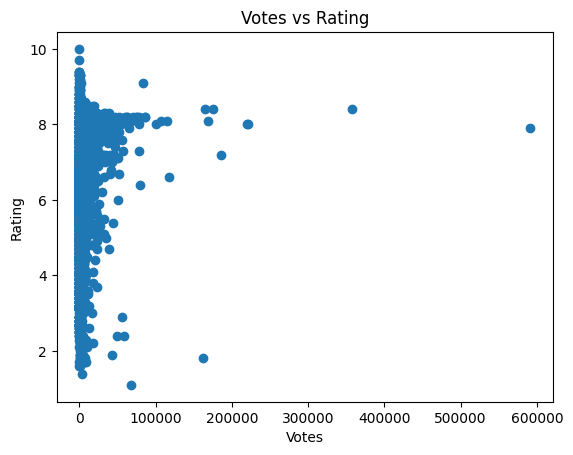

In [34]:
plt.scatter(df['Votes'], df['Rating'])
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

In [35]:
sample = X_test.iloc[0:1]
print("Predicted Rating:", model.predict(sample))
print("Actual Rating:", y_test.iloc[0])

Predicted Rating: [5.49521308]
Actual Rating: 6.0
